# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# Set the cryto assets as float type for future calculation
my_btc = float()
my_eth = float()

#  The amount of crypto coins in possession; Bitcoin = 1.2 units and Ethereum = 5.3 units
my_btc = 1.2
my_eth = 5.3




In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Using the requests.get function to tetch current BTC price from api.alternative.me website and covert the data into json type file
# We first use the requests.get to retrieve the price for Bitcoin and store in a new variable called btc_price
btc_price = requests.get(btc_url).json()
btc_price

# Inside the btc_price file, we can obtain the crytocurrency name and the value of this crytocurrency; two new variables (btc_name & btc_value) were created to store these information
btc_name = btc_price["data"]["1"]["name"]

btc_value = btc_price["data"]["1"]["quotes"]["CAD"]["price"]
btc_value

# Again, we use the requests.get to retrieve the price for the second crytocurrency and store in a new variable called eth_price
eth_price = requests.get(eth_url).json()
eth_price


# Inside the eth_price file, we can obtain the crytocurrency name and the value of this crytocurrency; two new variables (eth_name & eth_value)were created to store these information
eth_name = eth_price["data"]["1027"]["name"]

eth_value = eth_price["data"]["1027"]["quotes"]["CAD"]["price"]

eth_value


# To compute the total value of the each crytocurrency in possession, we cross-multiply each crytocurrency price with the amount of crytocurrency in possession.  The total value for
# BitCoin would be the my_btc * btc_value and the total value for Ethereum would be my_eth * eth_value
my_btc_value = my_btc * btc_value

my_eth_value = my_eth * eth_value
# Print current crypto wallet balance with only 2 decimals behind

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $52970.22
The current value of your 5.3 ETH is $15610.27


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Define the amount of agg bonds in possession; the amount of SPY stocks in possesion
my_agg = 200
my_spy = 50




In [8]:
# Set Alpaca's API key and secret key by fetching the data in env file in the directory

api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")

#To verify if the getenv is working, we use type function () to API key and Secret Key to ensure they return the string type and the api keys are functioning properly
type(api_key)
type(secret_key)

# Create the Alpaca API object and named it as alpaca
alpaca = tradeapi.REST (api_key,secret_key, api_version="v2")



In [9]:
# Using panda's Timestamp to format current date as ISO format, and set the date as June 10 Eastern Time Zone.  We store these data into new variable named today
 
today = pd.Timestamp("2021-06-10",tz="America/New_York").isoformat()
# Set the tickers AGG and SPY for retrieving the stock and bond data from Alpaca API
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG from Alpaca API and set the start and end as today.  The limit of the sample data would be set to 1000 to maximum the number 
# of data we can retrieve each time (use a limit=1000 parameter to call the most recent 1000 days of data)

# New dataframe named df_stock_prices is created and store all the stock and bond pricing data from Alpaca API
df_stock_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start =today,
    end = today,
    limit =1000
).df

# Preview new DataFrame df_stock_prices
df_stock_prices

AGG                                       SPY  \
                            open    high       low  close   volume    open   
2021-06-10 00:00:00-04:00  115.3  115.31  114.8605  115.3  3665934  422.96   

                                                             
                             high     low   close    volume  
2021-06-10 00:00:00-04:00  424.63  421.55  423.58  43577329

In [10]:
# For our calculation, we use only close price from the dataframe df_stock_prices.  We therefore select AGG and SPY close prices from the dataframe and store into 
# new dataframe variables agg_close_price and spy_close_price.  We further assign the close price as floating type data 

agg_close_price = float(df_stock_prices["AGG"]["close"])
spy_close_price = float(df_stock_prices["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.3
Current SPY closing price: $423.58


In [11]:
# Compute the current value of shares in each asset by cross multiplying the amount of AGG and SPY in possession and with the close price for each asset 
# New dataframe variables my_spy_value and my_agg_value
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21179.00
The current value of your 200 AGG shares is $23060.00


### Savings Health Analysis

In [12]:
# Set monthly household income to be $12000 each month
monthly_income = 12000

# Consolidate financial assets data for each asset group; Crytocurrency and stock; create new dataframe variables total_value_crypto to store the total monetary value of all crytocurrency in possession 
# (BTC and ETH).  We also create another new dataframe variable total_value_securities to store the total monetary value of all stocks and bond in these securities (SPY and AGG)
total_value_crypto = float(my_btc_value+my_eth_value)
total_value_securities = float(my_spy_value+my_agg_value)

# Create a new list to store different asset group; crypto and shares for 
saving_type = ["crypto","shares"]

# Create a dictionary saving_amount for tabulating the values in crypto and in other securities.  
saving_amount = {
            "Amount":[total_value_crypto,total_value_securities]
            }
#Create new dataframe df_savings to display the monetary amount in each asset group and assign each asset group name as the index column
df_savings = pd.DataFrame(saving_amount,index=saving_type)
# Display savings DataFrame
display(df_savings)

,Amount
crypto,68580.480545
shares,44239.000000


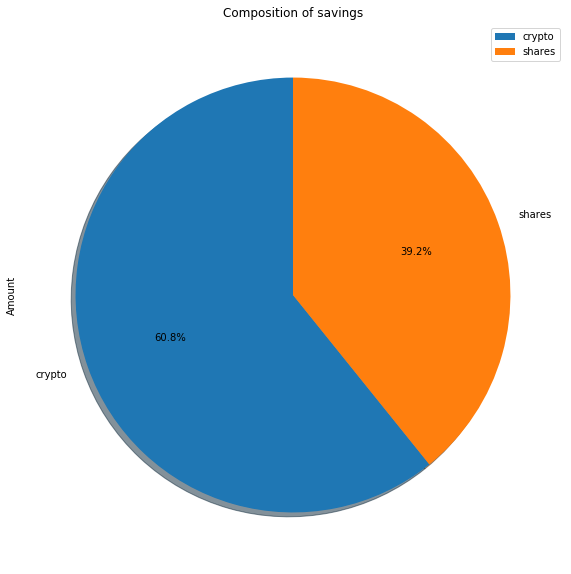

In [13]:
# From matplotlib to plot the df_savings dataframe to pie chart for illustration with y axis as "Amount" variable


df_savings_pie = df_savings.plot.pie(y="Amount", figsize=(10,10), title = "Composition of savings", 
                                     autopct='%1.1f%%',shadow=True, startangle=90)



In [14]:
# Set ideal emergency fund with 3 times the monthly income
emergency_fund = monthly_income * 3

# Calculate total amount of savings by taking the summation of total crypto and total securities and assign the data type as float
total_savings = float(total_value_crypto+total_value_securities)

# Rounding the total_savings with 2 decimal places
total_savings_round = round(total_savings,2)

# Validate saving health with the current saving amount with the conditional if statement.
# To verify if the total saving is greater than the emergency fund requirements; if yes, then print out the saving is sufficient.
# else if the total saving is equal to the emergency fund, then print out the total savings is meeting the financial goal; otherwise, it will print out the saving is insufficient and short by the amount
# between emergency fund's requirement and the total savings
if total_savings>emergency_fund:
    print (f"Congratulation! Your monthly saving of $", total_savings_round,"is financially sound and healthy for retirement.")
elif total_savings == emergency_fund:
    print (f"Congratulation! Your monthly saving of $", total_savings_round,"is meeting the financial goal for retirement.")
else:
    print (f"Your monthly saving is short of $", (emergency_fund-total_savings_round), "to meet the financial goal for retirement.")

    
        
           

Congratulation! Your monthly saving of $ 112819.48 is financially sound and healthy for retirement.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# To perform the Monte Carlo Simulation, we try to retrieve 5 years historical data to run the simulation.  We first set start and end dates of five years back from today to retrieve the data from
# Alpaca API.  However, the limit of data entries is 1000 and this limit our alpaca.get_barset data to maximum of 3 years data. As a result, we have to divide into two dataframes to collect 5 years data.
# We then concatinate two dataframes to one big dataframe.  As a result, we have to define two sets of start_date and end_date for Alpaca API.  
# One set of start_date dataframe from 2016 to 2019 May and the other one from 2019-05-02 to 2021-05-01.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-05-01', tz='America/New_York').isoformat()

start_date2 = pd.Timestamp('2019-05-02', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()


In [16]:
# Using get_barset() to get 5 years' worth of historical data for SPY and AGG and store them into 2 new dataframes from different timeframe,
# then we concat these two dataframes into one dataframe called "df_stock_data" which will contain all 5 years data for two securites
 
df_stock_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start =start_date,
    end = end_date,
    limit =1000
).df

df_stock_prices2 = alpaca.get_barset(
    tickers,
    timeframe,
    start =start_date2,
    end = end_date2,
    limit =1000
).df


df_stock_data = pd.concat([df_stock_prices, df_stock_prices2],axis="rows",join="inner")

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773.0   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893.0   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710.0   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143.0   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464.0   

                              SPY                                    
                             open    high     low   close    volume  
2016-05-02 00:00:00-04:00  206.92  208.18  206.41  207.97  52152807  
2016-05-03 00:00:00-04:00  206.52  206.80  205.28  206.15  79397652  
2016-05-04 00:00:00-04:00  204.99  205.85  204.42  204.99  73747383  
2016-05-05 00:00:00-04:00  205.56  205.98  204.47  204.98  58322810  
2016-05-06 00:00:00-04:00  204.06  205.77  203.88  205.70  69458860

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns, with parameters portfolio_data as new dataframe "df_stock_data", weights of each security with 60% weight in stock 
# and 40% in bonds, number of simulation will be 500 and for 30 years.
mc_portfolio = MCSimulation(
                            portfolio_data = df_stock_data,
                            weights =[0.40,0.60],
                            num_simulation = 500,
                            num_trading_days = 252*30)



In [18]:
# Printing the simulation input data
mc_portfolio.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773.0   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893.0   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710.0   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143.0   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-05-02 00:00:00-04:00          NaN  206.92  208.18  206.41  207.97   
2016-05-03 00:00:00-04:00     0.002034  206.52  206.80  205.28  206.15   
2016-05-04 00:00:00-04:00     0.000541  204.99  205.85  204.42  204.99   
2016-05-05 00:00:00-04:00     0.002165  205.56  205.98  204.47  204.98   
2016-05-06 00:00:00-04:00    -0.001080  204.06  205.77  203.88  205.70   

                                                  
                             volume daily_return  
2016-05-02 00:00:00-04:00  52152807          NaN  
2016-05-03 00:00:00-04:00  79397652    -0.008751  
2016-05-04 00:00:00-04:00  73747383    -0.005627  
2016-05-05 00:00:00-04:00  58322810    -0.000049  
2016-05-06 00:00:00-04:00  69458860     0.003513

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns; cumulative return for each simulation in 30 years x 252 days/year.  Total data = 7561 rows x 500 columns
mc_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012735,1.004042,0.999845,0.998982,0.997880,1.019489,1.009368,1.006852,1.009742,1.001211,...,1.000308,0.995999,0.997857,0.992190,0.991188,1.007105,0.986643,1.000925,1.013520,1.003095
2,1.004774,1.012421,0.998037,1.000816,0.983427,1.029003,1.006225,1.006712,1.010645,0.999374,...,0.991469,0.992877,1.002386,0.982118,0.992755,1.015723,0.990716,0.996601,1.007365,1.006726
3,1.018258,1.027089,0.992745,1.006903,0.973042,1.031710,1.001300,1.007838,0.997200,1.009244,...,0.989635,0.988292,1.005285,0.980458,0.986223,1.022653,0.987986,0.991385,1.005492,1.001928
4,1.038259,1.028003,0.991209,1.017280,0.968879,1.026597,1.000128,1.003193,0.992433,1.005502,...,1.005870,0.993127,0.998477,0.988235,0.973822,1.035284,0.990003,0.989278,1.004097,1.011066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.357243,16.069546,14.187809,13.996083,10.869730,5.390157,43.621364,16.658314,16.924047,7.124029,...,13.352309,11.062520,9.927733,29.910032,11.405599,11.829416,25.376144,25.764768,18.411457,20.681795
7557,9.397868,16.088835,14.152912,13.921228,10.908404,5.350409,43.860764,16.696339,17.199677,7.058312,...,13.454210,11.106038,9.932514,29.747039,11.498775,11.897302,25.244819,25.781885,18.498347,20.510241
7558,9.378398,16.183765,14.004079,13.925915,11.017398,5.373576,44.156548,16.805905,16.875974,7.057025,...,13.504242,11.090688,9.959408,29.489936,11.473610,11.915680,25.323242,25.730242,18.355582,20.695155
7559,9.315625,16.257848,13.957312,14.027940,11.021167,5.445689,43.721818,16.838706,16.706720,7.072403,...,13.594331,11.162109,9.914762,29.286621,11.492149,11.931440,25.686652,25.537667,18.363555,20.921457


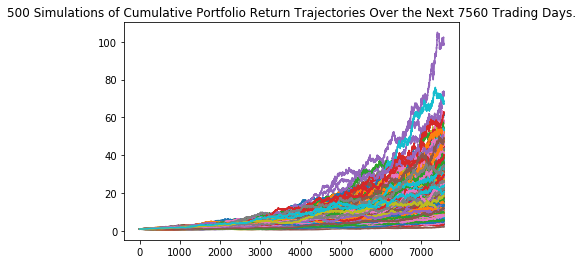

In [50]:
# Plot simulation outcomes with x axis as the number of simulation and y axis as the cumulative return for the portfolio from the simulation
sim_plot = mc_portfolio.plot_simulation()

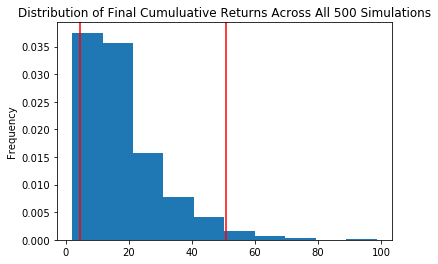

In [21]:
# Plot probability distribution and confidence intervals from the simulation results,
dist_plot = mc_portfolio.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics of cumulative return from the Monte Carlo simulation results
portfolio_tbl = mc_portfolio.summarize_cumulative_return()

# Print summary statistics
print(portfolio_tbl)

count           500.000000
mean             18.438077
std              12.821357
min               2.100021
25%               9.223469
50%              14.710407
75%              23.193524
max              98.592079
95% CI Lower      4.606749
95% CI Upper     50.749579
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment equals to $20000
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000; the 95% lower confidence interval is retrieved from the descriptive statistics
# of the portfolio_tbl with index of [8] while the upper confidence interval with index of  [9].  These two number are rounded to 2 decimal places.
ci_lower = round(initial_investment*portfolio_tbl[8],2)
ci_upper = round(initial_investment*portfolio_tbl[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92134.97 and $1014991.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# SSet initial investment equals to $30000
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000; the 95% lower confidence interval is retrieved from the descriptive statistics
# of the portfolio_tbl with index of [8] while the upper confidence interval with index of  [9].  These two number are rounded to 2 decimal places.
ci_lower = round(initial_investment*portfolio_tbl[8],2)
ci_upper = round(initial_investment*portfolio_tbl[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138202.46 and $1522487.37


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns, so that the amount of saving in portfolio would meet the financial goal of retirement similar to that of 30 years.  
# The number of trading is set to 5 years x 252 days and we run for 500 simulation each day.  The weight of the portfolio would be adjusted to 30% bonds and 70% stocks to capture more return to meet
# the retirement goal in 5 years.

mc_5yr_portfolio = MCSimulation(
                            portfolio_data = df_stock_data,
                            weights =[0.3,0.7],
                            num_simulation = 500,
                            num_trading_days = 252*5)

mc_5yr_portfolio.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773.0   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893.0   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710.0   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143.0   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-05-02 00:00:00-04:00          NaN  206.92  208.18  206.41  207.97   
2016-05-03 00:00:00-04:00     0.002034  206.52  206.80  205.28  206.15   
2016-05-04 00:00:00-04:00     0.000541  204.99  205.85  204.42  204.99   
2016-05-05 00:00:00-04:00     0.002165  205.56  205.98  204.47  204.98   
2016-05-06 00:00:00-04:00    -0.001080  204.06  205.77  203.88  205.70   

                                                  
                             volume daily_return  
2016-05-02 00:00:00-04:00  52152807          NaN  
2016-05-03 00:00:00-04:00  79397652    -0.008751  
2016-05-04 00:00:00-04:00  73747383    -0.005627  
2016-05-05 00:00:00-04:00  58322810    -0.000049  
2016-05-06 00:00:00-04:00  69458860     0.003513

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns; cumulative return for each simulation in 5 years x 252 days/year.  Total data = 1261 rows x 500 columns
mc_5yr_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997014,1.018473,1.001058,0.991159,1.005530,1.002579,0.999658,0.992488,1.005401,1.007057,...,1.004476,1.002568,1.003249,1.000681,1.001242,0.992948,0.992144,0.998188,1.002145,1.016579
2,0.996977,1.022842,1.001259,0.983465,1.012148,1.002209,1.001788,0.990719,1.008139,1.009962,...,1.000514,0.986923,1.012977,0.992812,0.999549,0.994787,0.990730,1.013914,0.998059,1.028008
3,0.996311,1.031511,1.009752,0.982447,1.005306,1.025604,1.003440,0.978278,1.007121,1.017490,...,0.998175,0.993734,1.009445,1.004355,0.990631,1.007577,0.998299,1.026403,0.997700,1.020910
4,1.003676,1.042516,1.015932,0.994280,1.001760,1.015106,1.000020,0.980712,1.013309,1.041902,...,0.997935,0.987804,1.001601,1.010194,0.988246,1.005003,1.000813,1.025970,0.990497,1.026697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.591332,1.466644,1.731591,1.746523,1.760979,2.543797,1.735156,2.292777,1.785221,1.681750,...,1.201519,2.539070,2.339459,2.084724,2.306669,2.238908,2.186297,1.513622,2.280537,1.647298
1257,1.595233,1.458040,1.740168,1.752240,1.757448,2.538254,1.762769,2.280796,1.780010,1.682193,...,1.205318,2.537289,2.342098,2.091271,2.313295,2.245522,2.186545,1.507616,2.284879,1.656666
1258,1.606415,1.462122,1.743689,1.745750,1.757877,2.510206,1.754647,2.309689,1.792986,1.678459,...,1.207789,2.508159,2.361674,2.110696,2.300502,2.248116,2.202421,1.531758,2.299016,1.656668
1259,1.634820,1.459244,1.727207,1.735371,1.752575,2.537623,1.773699,2.324983,1.785213,1.679466,...,1.207276,2.517475,2.387661,2.091595,2.288348,2.269771,2.199820,1.555582,2.271196,1.646571


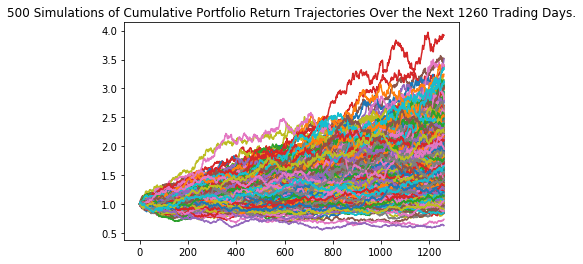

In [28]:
# Plot simulation outcomes with x axis as the number of simulation and y axis as the cumulative return for the portfolio from the simulation
sim_5yr_plot = mc_5yr_portfolio.plot_simulation()

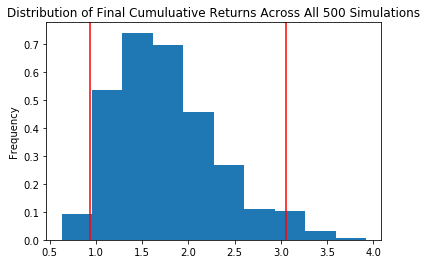

In [29]:
# Plot probability distribution and confidence intervals from the simulation results,
dist_5yr_plot = mc_5yr_portfolio.plot_distribution()

In [30]:
# Fetch summary statistics of cumulative return from the Monte Carlo simulation results
mc_5yr_tbl = mc_5yr_portfolio.summarize_cumulative_return()

# Print summary statistics
print(mc_5yr_tbl)

count           500.000000
mean              1.761536
std               0.551369
min               0.628063
25%               1.342592
50%               1.686786
75%               2.097803
max               3.918757
95% CI Lower      0.930336
95% CI Upper      3.049248
Name: 1260, dtype: float64


In [51]:
# Set initial investment equals to $60,000 so that we could get the return in the range of savings similar to 30 years
initial_5yr_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000; the 95% lower confidence interval is retrieved from the descriptive statistics
# of the portfolio_tbl with index of [8] while the upper confidence interval with index of  [9].  These two number are rounded to 2 decimal places.
ci_lower = round(initial_investment*portfolio_tbl[8],2)
ci_lower_five = round(initial_5yr_investment*mc_5yr_tbl[8],2)
ci_upper_five = round(initial_5yr_investment*mc_5yr_tbl[9],2)


# Print results for 5 year horizon
print(f"There is a 95% chance that an initial investment of ${initial_5yr_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55820.16 and $182954.9


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns, so that the amount of saving in portfolio would meet the financial goal of retirement similar to that of 30 years.  
# The number of trading is set to 10 years x 252 days and we run for 500 simulation each day.  The weight of the portfolio would be adjusted to 20% bonds and 80% stocks to capture more return to meet
# the retirement goal in 10 years.
mc_10yr_portfolio = MCSimulation(
                            portfolio_data = df_stock_data,
                            weights =[0.2,0.8],
                            num_simulation = 500,
                            num_trading_days = 252*10)

mc_10yr_portfolio.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773.0   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893.0   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710.0   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143.0   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-05-02 00:00:00-04:00          NaN  206.92  208.18  206.41  207.97   
2016-05-03 00:00:00-04:00     0.002034  206.52  206.80  205.28  206.15   
2016-05-04 00:00:00-04:00     0.000541  204.99  205.85  204.42  204.99   
2016-05-05 00:00:00-04:00     0.002165  205.56  205.98  204.47  204.98   
2016-05-06 00:00:00-04:00    -0.001080  204.06  205.77  203.88  205.70   

                                                  
                             volume daily_return  
2016-05-02 00:00:00-04:00  52152807          NaN  
2016-05-03 00:00:00-04:00  79397652    -0.008751  
2016-05-04 00:00:00-04:00  73747383    -0.005627  
2016-05-05 00:00:00-04:00  58322810    -0.000049  
2016-05-06 00:00:00-04:00  69458860     0.003513

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns; cumulative return for each simulation in 5 years x 252 days/year.  Total data = 2521 rows x 500 columns
mc_10yr_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994261,0.996657,1.012766,0.990529,1.000223,0.999960,1.003214,0.994726,0.995807,0.997384,...,1.005021,0.989953,0.975161,0.997413,0.998071,1.003964,1.011620,1.008393,1.000799,0.994669
2,0.978004,0.982472,1.008673,0.998627,1.015360,0.995091,1.000346,0.989523,0.996839,1.003736,...,1.001354,0.990747,0.969227,0.985352,0.996532,1.016334,1.009714,1.007410,0.996669,1.003227
3,0.986017,0.979146,1.017230,0.988468,1.006220,1.000414,0.997256,0.979724,0.992528,1.006189,...,0.997438,0.998754,0.954808,0.981245,1.003830,1.035037,1.014410,0.996077,1.004245,0.998995
4,0.973540,0.989868,1.016264,0.995408,1.015755,1.005468,0.994863,0.979314,1.003715,1.006963,...,1.012980,1.004497,0.967802,0.982902,1.005581,1.030922,0.998829,0.985568,1.013583,0.993762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.610681,4.736579,3.078452,5.089960,3.558296,3.288884,7.216660,4.517636,2.334934,3.744970,...,1.796235,4.905637,1.504169,2.161920,1.740921,3.742123,3.093064,3.273596,2.534515,2.723306
2517,4.661356,4.748325,3.065415,5.130446,3.606394,3.330903,7.169746,4.523875,2.361816,3.722923,...,1.790508,4.899068,1.513529,2.140648,1.715380,3.784270,3.073673,3.295797,2.539722,2.698454
2518,4.721805,4.754311,3.054493,5.124176,3.591506,3.349496,7.073161,4.559077,2.332367,3.759842,...,1.785973,4.895593,1.532820,2.171329,1.737473,3.738511,3.067303,3.245808,2.516723,2.690514
2519,4.689367,4.704901,3.057362,5.106852,3.602309,3.392348,7.031362,4.581087,2.354806,3.782408,...,1.770177,4.842366,1.524713,2.154674,1.702594,3.739036,3.063486,3.230436,2.522852,2.721689


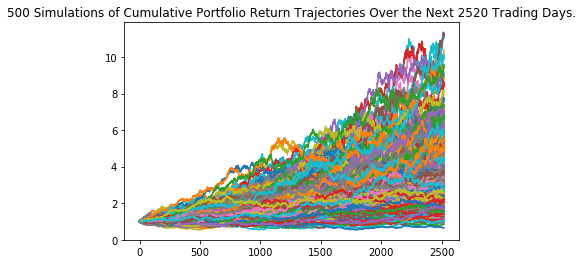

In [34]:
# Plot simulation outcomes with x axis as the number of simulation and y axis as the cumulative return for the portfolio from the simulation
sim_10yr_plot = mc_10yr_portfolio.plot_simulation()

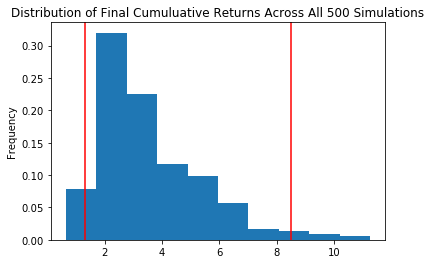

In [35]:
# Plot probability distribution and confidence intervals from the simulation results,
dist_10yr_plot = mc_10yr_portfolio.plot_distribution()

In [36]:
# Fetch summary statistics of cumulative return from the Monte Carlo simulation results
mc_10yr_tbl = mc_10yr_portfolio.summarize_cumulative_return()

# Print summary statistics
print(mc_10yr_tbl)

count           500.000000
mean              3.551979
std               1.819031
min               0.640512
25%               2.251610
50%               3.088179
75%               4.426607
max              11.267047
95% CI Lower      1.302492
95% CI Upper      8.511505
Name: 2520, dtype: float64


In [52]:
# Set initial investment
initial_10yr_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000; the 95% lower confidence interval is retrieved from the descriptive statistics
# of the portfolio_tbl with index of [8] while the upper confidence interval with index of  [9].  These two number are rounded to 2 decimal places.
ci_lower_ten = round(initial_10yr_investment*mc_10yr_tbl[8],2)
ci_upper_ten = round(initial_10yr_investment*mc_10yr_tbl[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_10yr_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $78149.54 and $510690.29
